In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [2]:
customers = pd.read_csv('Customers.csv')

# Display basic information about the dataset

In [3]:
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


# Display the first few rows of the dataset

In [4]:
print(customers.head())

# Check for missing values
print(customers.isnull().sum())

# Summary statistics
print(customers.describe())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


# Distribution of customers by region

C:\Users\askar\AppData\Local\Temp\ipykernel_12100\2480107416.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='viridis')


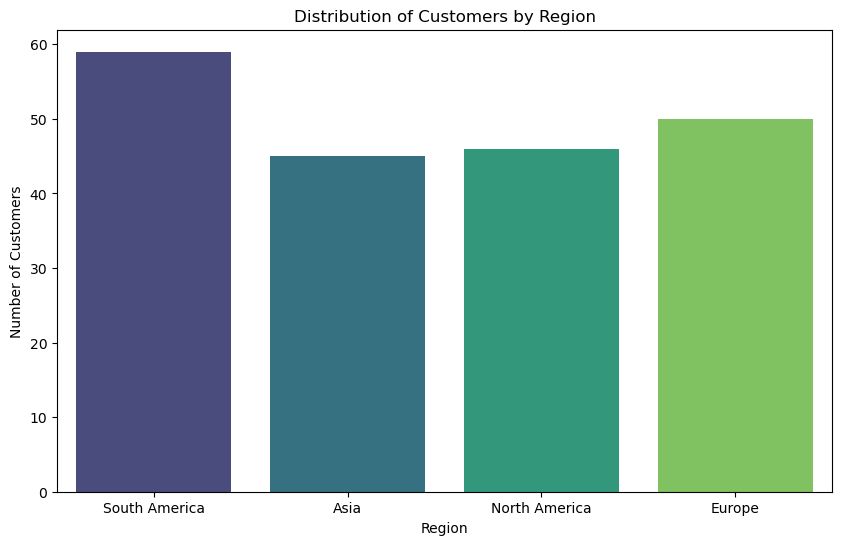

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region', palette='viridis')
plt.title('Distribution of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

# Signup date analysis

C:\Users\askar\AppData\Local\Temp\ipykernel_12100\3498475406.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='SignupYear', palette='magma')


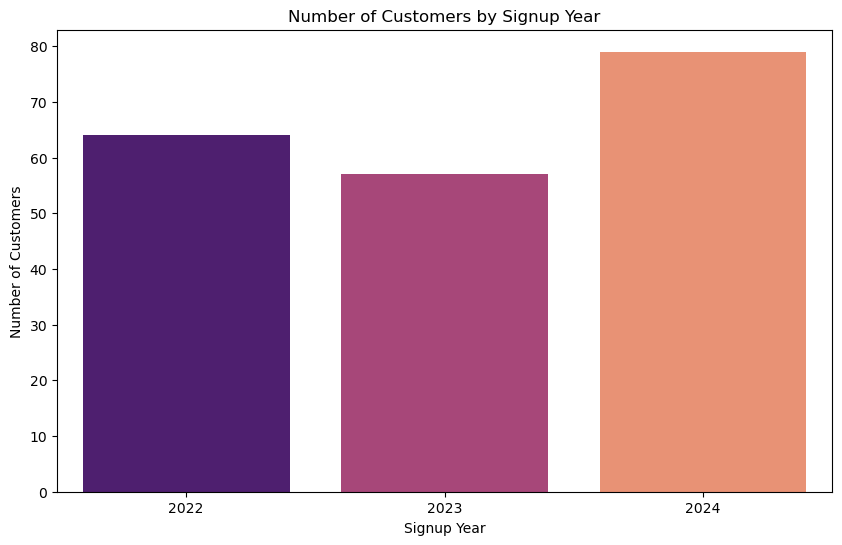

In [6]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupYear'] = customers['SignupDate'].dt.year
customers['SignupMonth'] = customers['SignupDate'].dt.month_name()

# Customers by signup year
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='SignupYear', palette='magma')
plt.title('Number of Customers by Signup Year')
plt.xlabel('Signup Year')
plt.ylabel('Number of Customers')
plt.show()

# Customers by month of signup

C:\Users\askar\AppData\Local\Temp\ipykernel_12100\1077399850.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='SignupMonth', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], palette='coolwarm')


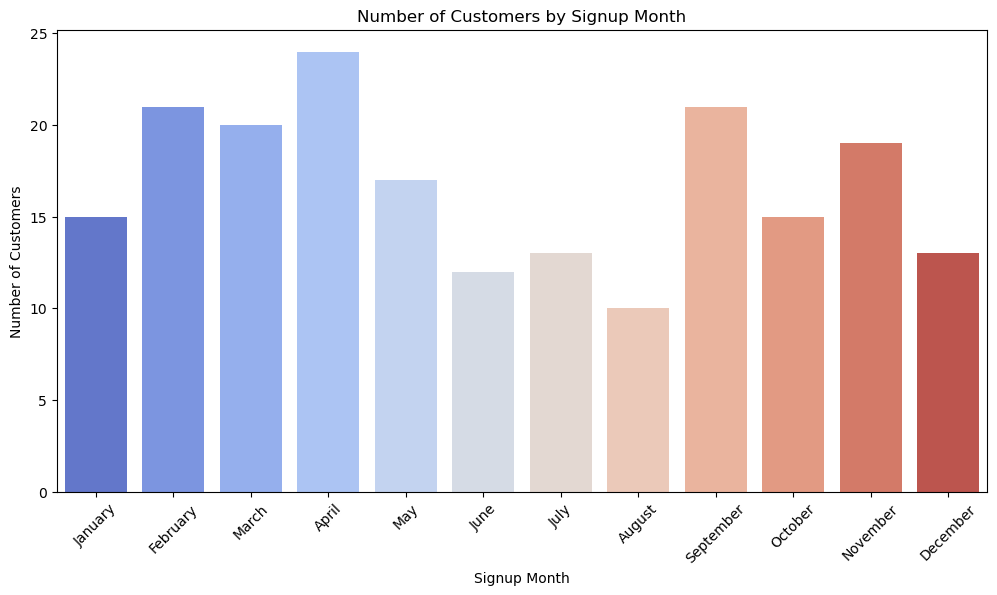

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(data=customers, x='SignupMonth', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], palette='coolwarm')
plt.title('Number of Customers by Signup Month')
plt.xlabel('Signup Month')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

# Customers by region and signup year

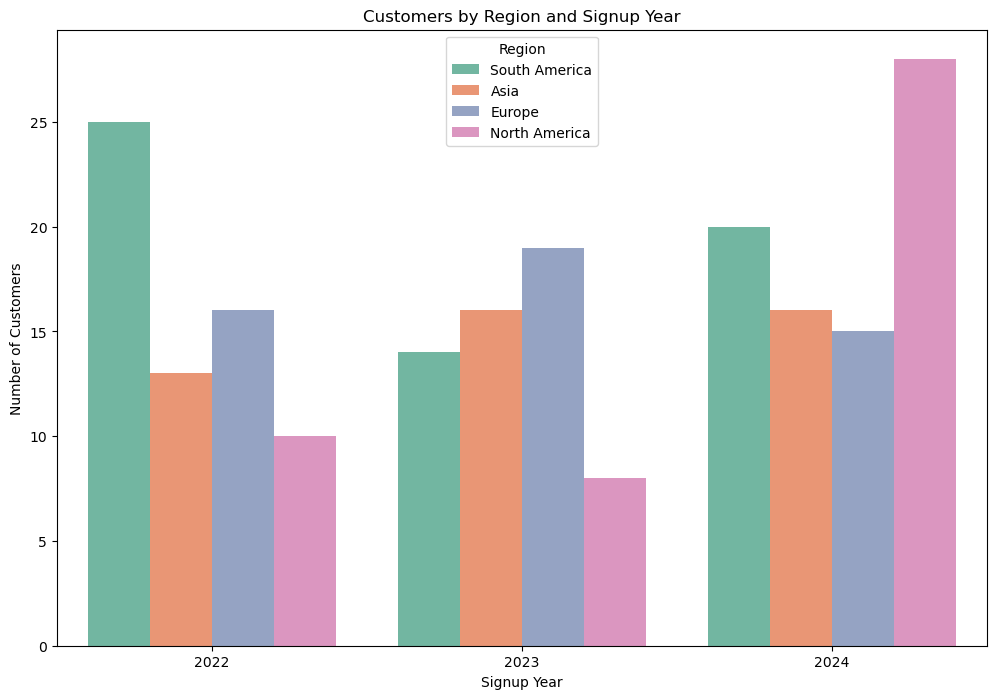

In [8]:
plt.figure(figsize=(12, 8))
sns.countplot(data=customers, x='SignupYear', hue='Region', palette='Set2')
plt.title('Customers by Region and Signup Year')
plt.xlabel('Signup Year')
plt.ylabel('Number of Customers')
plt.legend(title='Region')
plt.show()

# Analyzing the distribution of customers by signup year and region

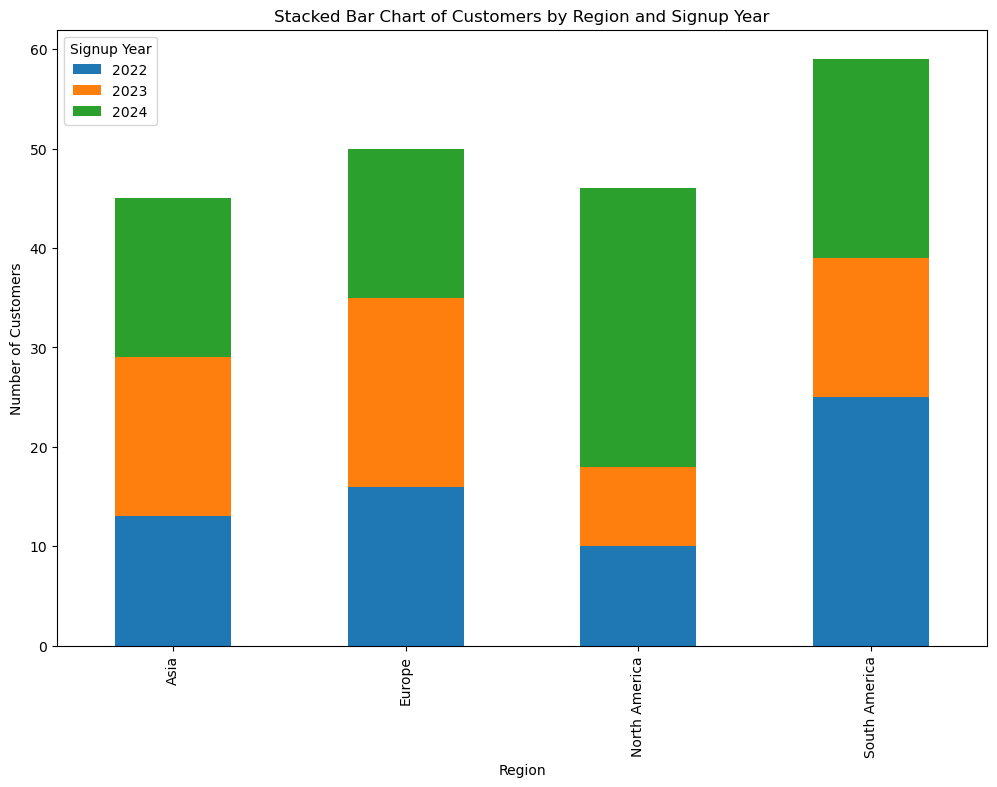

In [9]:
region_year_counts = customers.groupby(['Region', 'SignupYear']).size().unstack()
region_year_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Stacked Bar Chart of Customers by Region and Signup Year')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.legend(title='Signup Year')
plt.show()

# Analyzing the signup trends over the years

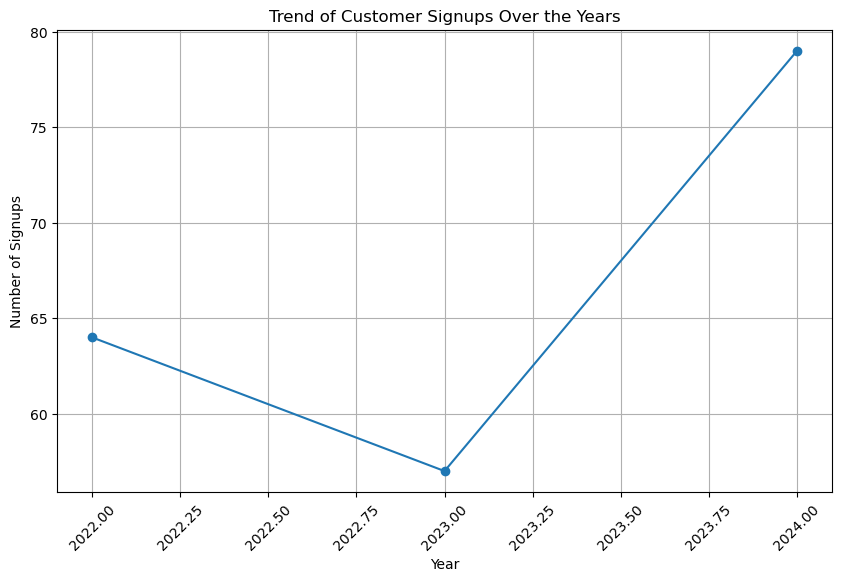

In [10]:
plt.figure(figsize=(10, 6))
customers.groupby('SignupYear')['CustomerID'].count().plot(marker='o')
plt.title('Trend of Customer Signups Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.grid()
plt.show()


# Analyzing the signup trends by region

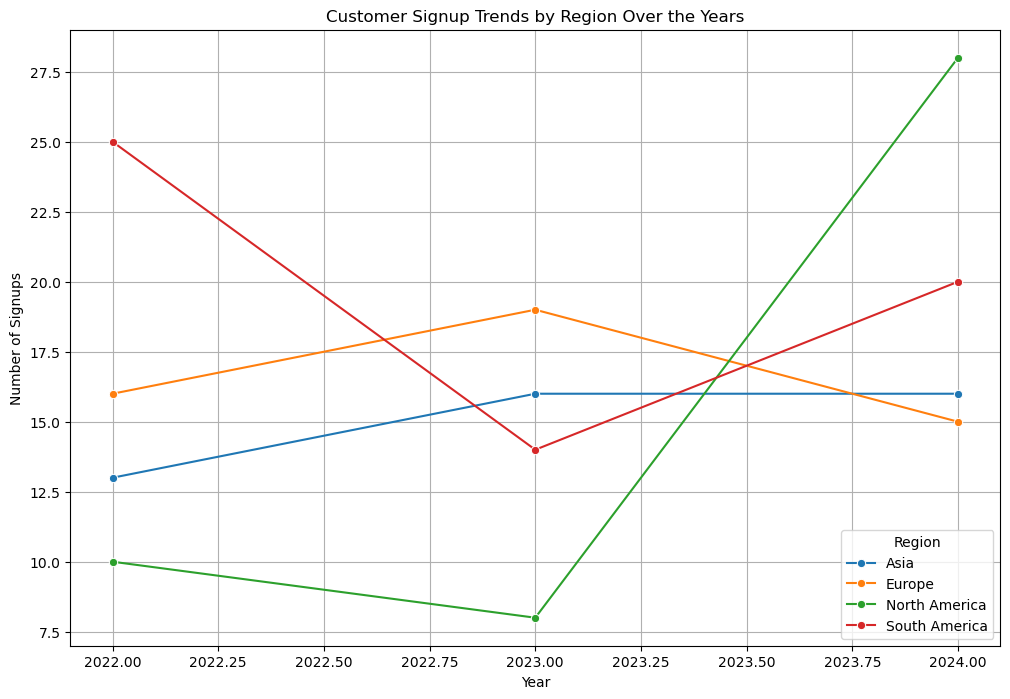

In [11]:
plt.figure(figsize=(12, 8))
signup_trends = customers.groupby(['SignupYear', 'Region']).size().reset_index(name='Count')
sns.lineplot(data=signup_trends, x='SignupYear', y='Count', hue='Region', marker='o', palette='tab10')
plt.title('Customer Signup Trends by Region Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.grid()
plt.show()

# Analyzing the distribution of customers by signup year

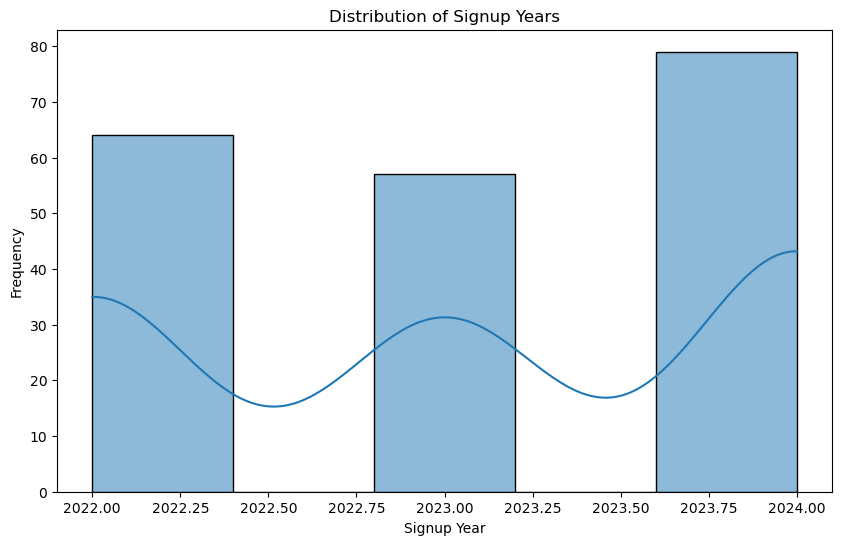

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(customers['SignupYear'], bins=5, kde=True)
plt.title('Distribution of Signup Years')
plt.xlabel('Signup Year')
plt.ylabel('Frequency')
plt.show()

# Analyzing the number of customers per region

C:\Users\askar\AppData\Local\Temp\ipykernel_12100\3210941430.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='pastel')


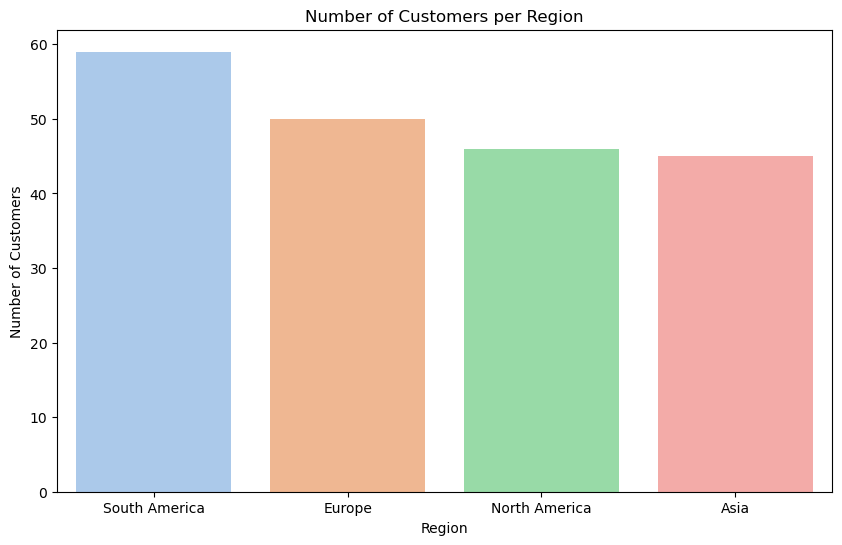

In [13]:
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='pastel')
plt.title('Number of Customers per Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()